# 测试k均值聚类

考古学家对三个不同区域（Region）中五个不同窑炉（Kiln）出土的罗马世纪的陶器展开研究。区域1包括窑炉1号，区域2包括窑炉2号和3号，区域3包括窑炉4号和5号。数据集包含了45个陶器的9种化学成分，数据集地址：案例数据集《多元统计分析-聚类分析-K-均值聚类（K-中值、K-众数）-陶器化学成分》​​​​​​​。我们需要验证的是：是否不同出土地的陶器化学成分也不同？

如果不同出土地的陶器化学成分不同，就可以利用以往的经验（同一个出土地的陶器化学成分一致）直接保存，不用再费力检测化学成分了。所以问题就变成了，对包含了45个陶器的9种化学成分进行聚类（聚成3类），看聚类的结果是否与区域（3个区域）对得上？

In [34]:
# 导入必要的包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# 导入数据集
data = pd.read_table('k均值聚类\pots.txt',sep=' ')
data

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\86151\AppData\Local\Temp\ipykernel_28604\526156.py:2: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_table('k均值聚类\pots.txt',sep=' ')


,Al2O3,Fe2O3,MgO,CaO,Na2O,K2O,TiO2,MnO,BaO,kiln
0,18.8,9.52,2.00,0.79,0.40,3.20,1.01,0.077,0.015,1
1,16.9,7.33,1.65,0.84,0.40,3.05,0.99,0.067,0.018,1
2,18.2,7.64,1.82,0.77,0.40,3.07,0.98,0.087,0.014,1
3,16.9,7.29,1.56,0.76,0.40,3.05,1.00,0.063,0.019,1
4,17.8,7.24,1.83,0.92,0.43,3.12,0.93,0.061,0.019,1
5,18.8,7.45,2.06,0.87,0.25,3.26,0.98,0.072,0.017,1
6,16.5,7.05,1.81,1.73,0.33,3.20,0.95,0.066,0.019,1
7,18.0,7.42,2.06,1.00,0.28,3.37,0.96,0.072,0.017,1
8,15.8,7.15,1.62,0.71,0.38,3.25,0.93,0.062,0.017,1
9,14.6,6.87,1.67,0.76,0.33,3.06,0.91,0.055,0.012,1


## 计算距离矩阵

In [36]:
import scipy.cluster.hierarchy as sch 

A = data.iloc[:,:9]

# A是一个向量矩阵：euclidean代表欧式距离
distA=sch.distance.pdist(A,metric='euclidean')

distB = pd.DataFrame(sch.distance.squareform(distA.round(2)),columns=data.index,index=data.index)
distB

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.00,2.92,1.99,2.97,2.50,2.08,3.51,2.27,3.84,4.98,...,8.50,8.01,8.29,7.93,8.44,8.71,8.61,9.13,8.10,8.18
1,2.92,0.00,1.35,0.13,0.93,1.96,1.04,1.24,1.14,2.35,...,6.45,5.37,6.15,5.81,7.15,6.49,6.55,6.70,5.31,6.38
2,1.99,1.35,0.00,1.37,0.59,0.72,2.05,0.55,2.47,3.69,...,6.62,6.07,6.38,6.03,6.83,6.78,6.72,7.18,6.21,6.37
3,2.97,0.13,1.37,0.00,0.96,1.99,1.12,1.29,1.13,2.34,...,6.39,5.30,6.09,5.75,7.10,6.43,6.49,6.64,5.24,6.32
4,2.50,0.93,0.59,0.96,0.00,1.07,1.55,0.47,2.03,3.23,...,6.28,5.61,6.03,5.69,6.68,6.41,6.38,6.76,5.71,6.11
5,2.08,1.96,0.72,1.99,1.07,0.00,2.50,0.82,3.05,4.27,...,6.54,6.27,6.33,6.00,6.53,6.76,6.64,7.24,6.50,6.24
6,3.51,1.04,2.05,1.12,1.55,2.50,0.00,1.74,1.26,2.15,...,6.51,5.32,6.21,5.90,7.35,6.51,6.60,6.66,5.20,6.51
7,2.27,1.24,0.55,1.29,0.47,0.82,1.74,0.00,2.28,3.49,...,6.54,5.95,6.29,5.96,6.82,6.69,6.63,7.06,6.06,6.34
8,3.84,1.14,2.47,1.13,2.03,3.05,1.26,2.28,0.00,1.25,...,6.63,5.11,6.29,5.97,7.68,6.56,6.72,6.61,4.83,6.71
9,4.98,2.35,3.69,2.34,3.23,4.27,2.15,3.49,1.25,0.00,...,6.92,4.96,6.55,6.27,8.32,6.74,7.00,6.59,4.44,7.14


<Axes: >

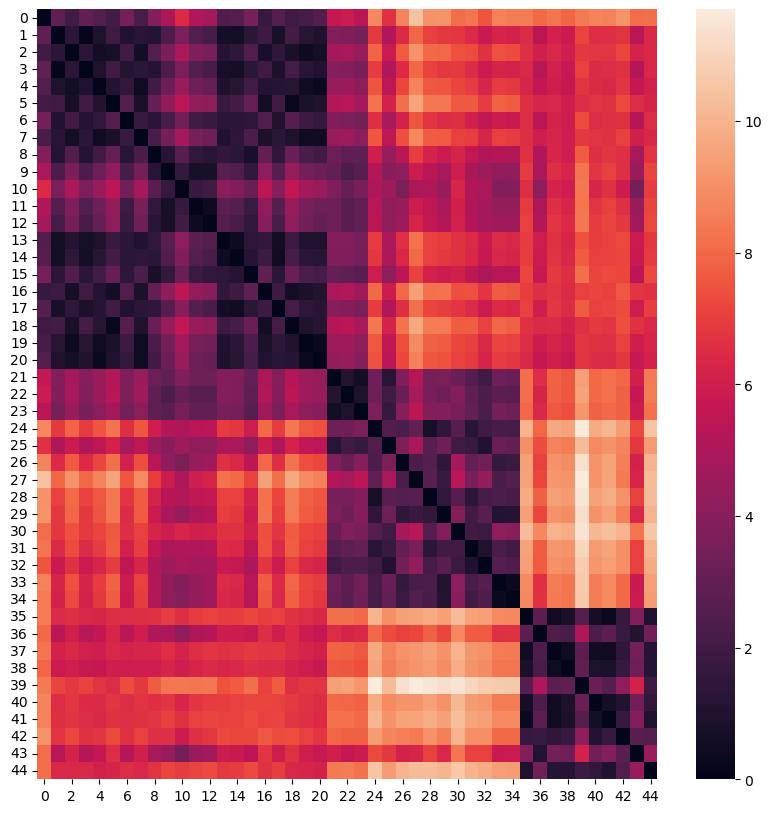

In [37]:
# 可通过热图展示距离矩阵的分布。


import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #表示绘制图形的画板尺寸为6*4.5；
sns.heatmap(distB)

## k聚类

### 族群内方差(WGSS)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

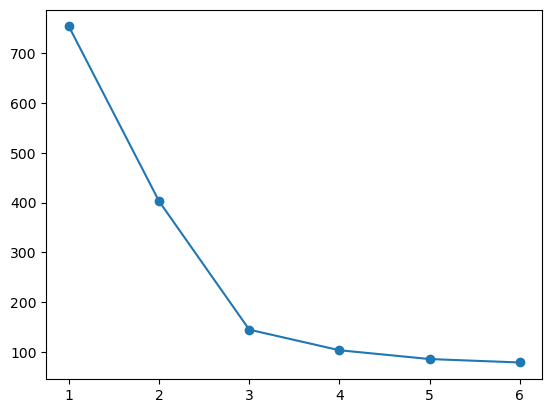

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
wgss=[]   
for i in range(6):
    cluster = KMeans(n_clusters=i+1, random_state=0).fit(A)
    wgss.append(cluster.inertia_)  #inertia_：每个点到其簇的质心的距离之和。即WGSS
 
#绘制WGSS的碎石图
plt.plot([i+1 for i in range(6)],wgss,marker='o')

### 轮廓系数(Silhouette)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

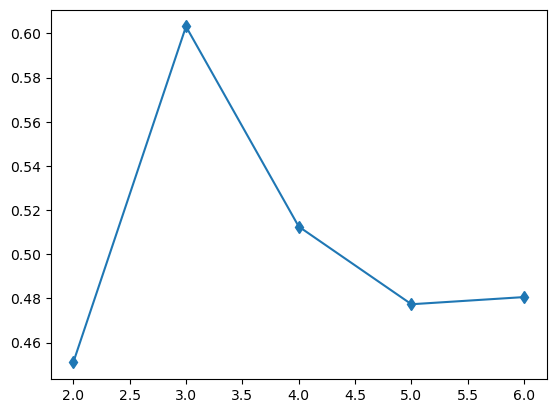

In [39]:
from sklearn.metrics import silhouette_score  #总的聚类效果轮廓系数
from sklearn.metrics import silhouette_samples   #单个样本的轮廓系数
silhouette_scores=[]   
for i in range(1,6):
    cluster = KMeans(n_clusters=i+1, random_state=0).fit(A)
    # 访问labels_属性，获得聚类结果
    y_pred = cluster.labels_
    # 计算平均轮廓系数
    silhouette_avg = silhouette_score(A, y_pred)
    silhouette_scores.append(silhouette_avg)
#绘制silhouette_scores的图形
plt.plot([i+1 for i in range(1,6)],silhouette_scores,marker='d')

### 聚类成3类

In [40]:
# 拟合模型
cluster = KMeans(n_clusters=3, random_state=0).fit(A)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
# 中心点坐标
center = cluster.cluster_centers_.round(2)
center

array([[12.44,  6.21,  4.78,  0.21,  0.23,  4.19,  0.68,  0.12,  0.02],
       [17.75,  1.61,  0.64,  0.04,  0.05,  2.02,  1.02,  0.  ,  0.02],
       [16.92,  7.43,  1.84,  0.94,  0.35,  3.1 ,  0.94,  0.07,  0.02]])

根据命题，区域1包括窑炉1号，区域2包括窑炉2号和3号，区域3包括窑炉4号和5号，我们将代表“区域”的标签和聚类结果的标签，填充进原数据集。如下

In [42]:
import numpy as np
#填充区域标签
bins=[0,1,3,5]
data['area']=pd.cut(data['kiln'],bins,labels=[1,2,3])
#填充聚类标签
data['cluser_label']=cluster.labels_  #labels_返回聚类结果列表
data

,Al2O3,Fe2O3,MgO,CaO,Na2O,K2O,TiO2,MnO,BaO,kiln,area,cluser_label
0,18.8,9.52,2.00,0.79,0.40,3.20,1.01,0.077,0.015,1,1,2
1,16.9,7.33,1.65,0.84,0.40,3.05,0.99,0.067,0.018,1,1,2
2,18.2,7.64,1.82,0.77,0.40,3.07,0.98,0.087,0.014,1,1,2
3,16.9,7.29,1.56,0.76,0.40,3.05,1.00,0.063,0.019,1,1,2
4,17.8,7.24,1.83,0.92,0.43,3.12,0.93,0.061,0.019,1,1,2
5,18.8,7.45,2.06,0.87,0.25,3.26,0.98,0.072,0.017,1,1,2
6,16.5,7.05,1.81,1.73,0.33,3.20,0.95,0.066,0.019,1,1,2
7,18.0,7.42,2.06,1.00,0.28,3.37,0.96,0.072,0.017,1,1,2
8,15.8,7.15,1.62,0.71,0.38,3.25,0.93,0.062,0.017,1,1,2
9,14.6,6.87,1.67,0.76,0.33,3.06,0.91,0.055,0.012,1,1,2


以上看出，聚类的结果和窑炉区域的分布完全一致。因此考古学家日后可直接根据出土地点判断陶器化学成分，从而制定保护方法，鉴定方法等。
聚类结果与窑炉区域的分布完全一致，所以我们可以进一步输出ARI（调整兰德系数）验证一下

In [43]:
from sklearn.metrics import adjusted_rand_score #调整兰德系数
print('ARI:%s'%(adjusted_rand_score(data['area'],data['cluser_label'])))

ARI:1.0


 ARI=1，说明聚类结果与“标准答案”完全一致。

我们也可以绘制主成分散点图来评估聚类效果的好坏。

Text(0, 0.5, 'PC1(32.35%)')

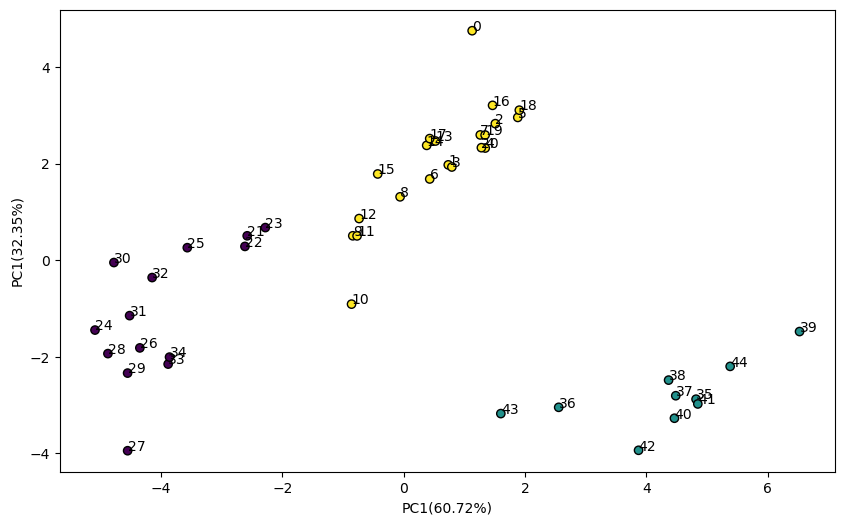

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)    #选择方差累积占比95%的主成分
 
A=data.iloc[:,0:9]
pca.fit(A)   #主城分析时每一行是一个输入数据
result = pca.transform(A)  #计算结果
fig=plt.figure(figsize=(10,6)) #表示绘制图形的画板尺寸为6*4.5；
plt.scatter(result[:, 0], result[:, 1], c=data['cluser_label'],edgecolor='k') #绘制两个主成分组成坐标的散点图
for i in range(result[:,0].size):
    plt.text(result[i,0],result[i,1],data.index.values[i])     #在每个点边上绘制数据名称
x_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[0]*100.0),2)   #x轴标签字符串
y_label = 'PC1(%s%%)' % round((pca.explained_variance_ratio_[1]*100.0),2)   #y轴标签字符串
plt.xlabel(x_label)    #绘制x轴标签
plt.ylabel(y_label)    #绘制y轴标签

## ARI与RI

### 缺点 1：随机聚类结果的高分数

In [45]:
import numpy as np
from sklearn.metrics import rand_score

# 标准标签
true_labels = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2]

# 完全随机的聚类结果
random_labels = np.random.permutation(true_labels)
print(f"True Labels: {true_labels}")
print(f"Random Labels: {random_labels}")

# 计算兰德系数
ri = rand_score(true_labels, random_labels)
print(f"Rand Index (Completely Random Clustering): {ri}")

True Labels: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2]
Random Labels: [0 1 1 2 2 1 0 0 1 0]
Rand Index (Completely Random Clustering): 0.5111111111111111


# 检测异常情况——发现离群点

In [46]:
# 导入必要的包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# 导入数据集
data = pd.read_csv('./k均值聚类/profile_telecom.csv')
data

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web
0,1964627,46,90,36,31
1,3107769,53,2,0,2
2,3686296,28,24,5,8
3,3961002,9,2,0,4
4,4174839,145,2,0,1
...,...,...,...,...,...
595,867603400,33,11,26,10
596,868648555,7,24,5,7
597,870629335,82,18,96,35
598,872364552,58,18,12,8


In [48]:
# 变量的相关系数矩阵
data.iloc[:, 1:].corr()

,cnt_call,cnt_msg,cnt_wei,cnt_web
cnt_call,1.000000,0.052096,0.117832,0.114190
cnt_msg,0.052096,1.000000,0.510686,0.739506
cnt_wei,0.117832,0.510686,1.000000,0.950492
cnt_web,0.114190,0.739506,0.950492,1.000000


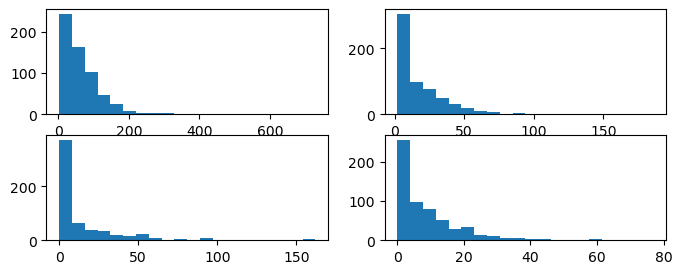

In [49]:
plt.figure(figsize=(8, 3))
 
for i in range(4):
    plt.subplot(220 + i + 1)
    plt.hist(data.iloc[:, i + 1], bins=20)
 
plt.show()

## 变量归一化——学生标准化

仅使用学生标准化进行预处理，不使用其它会改变数据分布形态的变换。

In [50]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
 
data_scaled = scale(data.loc[:, 'cnt_call':])  #学生标准化
data_scaled

array([[-0.296453  ,  3.68086843,  0.85513907,  2.08171356],
       [-0.1905409 , -0.80292101, -0.59755491, -0.64747691],
       [-0.56879838,  0.31802635, -0.39579186, -0.08281681],
       ...,
       [ 0.24823778,  0.01231344,  3.2762957 ,  2.45815362],
       [-0.11488941,  0.01231344, -0.11332358, -0.08281681],
       [ 1.01988304, -0.80292101, -0.59755491, -0.64747691]])

## 降维——主成分分析

In [51]:
pca = PCA(n_components=2)

data_pca = pca.fit_transform(data_scaled)
print('variance_ratio:', pca.explained_variance_ratio_)

variance_ratio: [0.62510442 0.24620209]


## K-means聚类

In [52]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=15).fit(data_pca)  #聚成四类
kmeans.cluster_centers_    #输出质心

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([[-0.43665026,  1.958979  ],
       [ 5.18848027, -0.18959833],
       [ 1.3964557 , -0.1171776 ],
       [-0.86416611, -0.28661873]])

## 聚类特征分析

轮廓系数

In [53]:
from sklearn.metrics import silhouette_score
silhouette_score(data_pca, kmeans.labels_)

0.5022446989081234

降维之后聚类效果

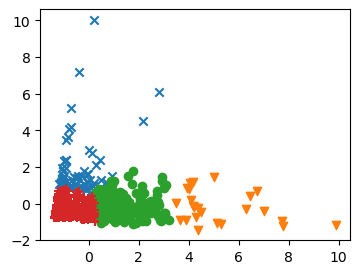

In [54]:
plt.figure(figsize=[4, 3])
 
markers = 'xvo+*^dDhs|_<,.>'
 
k = 4
 
for cluster, marker in zip(range(k), markers[:k]):
    x_axis = data_pca[:, 0][kmeans.labels_ == cluster]
    y_axis = data_pca[:, 1][kmeans.labels_ == cluster]
    plt.scatter(x_axis, y_axis, marker=marker)
    
plt.show()

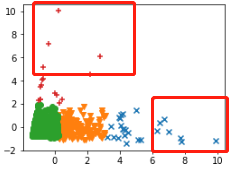

在没有进行数据分布形态转换的情况之下，比较明显的看出红框中为疑似离群点。注意：k=4是我们随意选择的数字，k我们可以选大一些，如7、8、9...，这样异常点检测的效果越明显。聚类完成之后，可以对数据样本按聚类标签进行分组，查看每个标签下都有多少个样本。

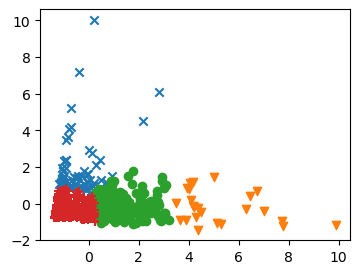

In [55]:
plt.figure(figsize=[4, 3])
 
markers = 'xvo+*^dDhs|_<,.>'
 
k = 6
 
for cluster, marker in zip(range(k), markers[:k]):
    x_axis = data_pca[:, 0][kmeans.labels_ == cluster]
    y_axis = data_pca[:, 1][kmeans.labels_ == cluster]
    plt.scatter(x_axis, y_axis, marker=marker)
    
plt.show()

## 聚类之后各类的数量

In [56]:
pd.DataFrame(data_pca)

,0,1
0,3.642864,-0.891070
1,-1.182101,-0.040078
2,-0.182031,-0.591736
3,-1.137980,-0.709455
4,-1.086750,1.343354
...,...,...
595,0.097364,-0.458731
596,-0.276217,-0.901276
597,3.471155,0.049195
598,-0.123971,-0.108705


In [57]:
pd.DataFrame(data_pca).groupby(kmeans.labels_)

In [58]:
pd.DataFrame(data_pca).groupby(kmeans.labels_).count()

,0,1
0,64,64
1,24,24
2,153,153
3,359,359


# 将个案数据做划分

## 变量分布转换——取对数

原始变量都是呈右偏分布的。

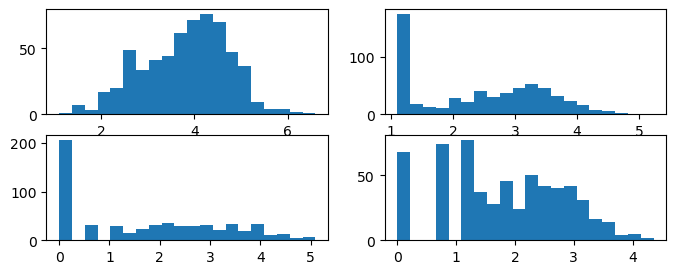

In [59]:
#  对变量取对数（也可取rank）
log_data = np.log1p(data.iloc[:, 1:]) #有很多0值，0值取对数是无意义的，所以+1之后取对数。
plt.figure(figsize=(8, 3))
for i in range(4):
    plt.subplot(220 + i + 1)
    plt.hist(log_data.iloc[:, i], bins=20)
 
plt.show()

右偏分布的数据集为了让其尽量靠近正态，处理的方法一般是取对数。结合实际业务，变量中有很多是0值，我们先将其+1，因为对0取对数是没有意义的。 

## 变量归一化——学生标准化

In [60]:
log_data_scaled = scale(log_data)  #学生标准化
log_data_scaled

array([[ 0.04174954,  1.98292009,  1.26385741,  1.60145475],
       [ 0.19291257, -1.24657303, -1.11310713, -0.63398781],
       [-0.48397217,  0.76013283,  0.06635716,  0.40350962],
       ...,
       [ 0.6609339 ,  0.50039436,  1.89829497,  1.71268561],
       [ 0.28932817,  0.50039436,  0.57532607,  0.40350962],
       [ 1.18246098, -1.24657303, -1.11310713, -0.63398781]])

注意，是否进行标准化，可以结合实际的业务场景，如本例题中，四个变量的量纲是一样的（单位都为“次数”） ，但是其各变量之间的方差差异是比较大的，所以需要进行标准化。否则后续的PCA效果可能不太好。

不需要标准化是有两个先决条件的：1、量纲一致；2、方差相近。

## 降维——主成分分析

In [61]:
log_pca = PCA(n_components=2)

log_data_pca = log_pca.fit_transform(log_data_scaled)
print('variance_ratio:', log_pca.explained_variance_ratio_)

variance_ratio: [0.71197124 0.22755356]


 前两个主成分方差占比超过90%，取两个主成分正好。前两个主成分（各变量的权重）如下：

In [62]:
components=log_pca.components_  #获得转换后的所有主成分
components

array([[ 0.22077367,  0.54471581,  0.5687719 ,  0.57536266],
       [ 0.97202048, -0.19050882, -0.08855497, -0.10507422]])

## 使用轮廓系数或者样本到类中心的距离和(离差平方和)确定聚类数量

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

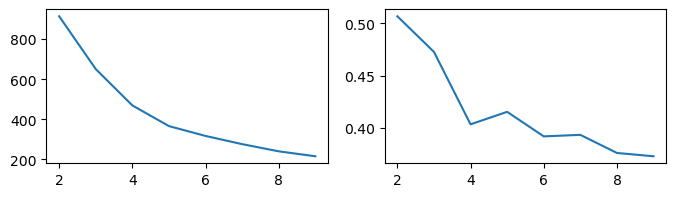

In [63]:
plt.figure(figsize=[8, 2])
Ks = range(2, 10)
rssds = []; silhs = []
for k in Ks:
    model = KMeans(n_clusters=k, n_init=15)
    model.fit(log_data_pca)
    rssds.append(model.inertia_)
    silhs.append(silhouette_score(log_data_pca, model.labels_, sample_size=None))
     # 轮廓系数计算复杂度高，使用sample_size
    
plt.subplot(121); plt.plot(Ks, rssds)
plt.subplot(122); plt.plot(Ks, silhs)
plt.show()

## 聚类特征分析

### 轮廓系数

In [65]:
k = 3
log_pca_kmeans = KMeans(n_clusters=k, n_init=15).fit(log_data_pca)
silhouette_score(log_data_pca, log_pca_kmeans.labels_)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.4728523836470572

### 降维之后聚类效果

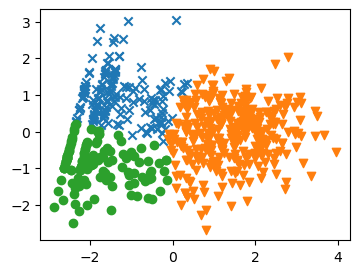

In [67]:
plt.figure(figsize=[4, 3])
 
for cluster, marker in zip(range(k), markers[:k]):
    x_axis = log_data_pca[:, 0][log_pca_kmeans.labels_ == cluster]
    y_axis = log_data_pca[:, 1][log_pca_kmeans.labels_ == cluster]
    plt.scatter(x_axis, y_axis, marker=marker)
    
plt.show()

我们发现3个簇之间，样本点相对是比较均匀的。可以根据聚类标签查看各类的样本数。

### 聚类之后各类的数量

In [69]:
pd.DataFrame(log_data_pca).groupby(log_pca_kmeans.labels_).count()

,0,1
0,154,154
1,312,312
2,134,134


从上面可以看出，各类是相对均衡的。

## 解释模型（特征分析）——使用原始数据

结合聚类结果，根据簇的标签进行分组，看原始数据各簇的质心（平均值）。

In [70]:
co = data.iloc[:, 1:5].groupby(log_pca_kmeans.labels_).mean()
co

,cnt_call,cnt_msg,cnt_wei,cnt_web
0,99.707792,4.324675,0.876623,1.766234
1,70.708333,30.153846,27.826923,15.538462
2,14.477612,4.335821,0.507463,1.552239


由上面我们可知：第一类：打电话最多，其他项目很少；第二类：所有项目用的都不多；第三类：所有项目都有用，且处于正常水平。

结合上面主成分分析输出的主成分：

array([[ 0.22077367,  0.54471581,  0.5687719 ,  0.57536266],
       [ 0.97202048, -0.19050882, -0.08855497, -0.10507422]])

第一个主成分，各变量的权重相对接近， 第二个主成分，第一个变量的权重较高。

通过以下的可视化更加直观：

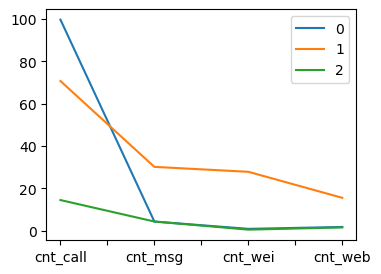

In [71]:
co.T.plot(figsize=[4, 3])
plt.show()

结论：在电信行业，打电话为基本业务，其他的为增值业务。第0簇：打电话较多，可进行语音包推荐；第1簇：所有项目都不多，属于低端用户，语音为刚性需求，可激活一些流量的需求，如闲时的流量包；第2簇：属于正常用户。